In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import scipy.stats as st
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#this script shows AR-dominant EP day fraction and cumulativ precipitation trends for a range of IVT thresholds

In [ ]:
if 1==1:#Taiwan
    ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan.nc')
    p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
    threshold=ds['threshold_99']
    dates=ds.large_scale_extreme_days
    print(dates)
    mean_obs_list=p.mean(dim=('lat','lon'),skipna=True).values.tolist()
    print(mean_obs_list)
    dates_pd=pd.DatetimeIndex(dates.values)
    years=[x.year for x in dates_pd]
    print(years)

In [ ]:
ds1=xr.open_dataset(dir+'taiwan_ep_days_stats_var90_newar.nc')
ar_yesno1=ds1['ar_yesno'].values.tolist()
ivt_yesno1=ds1['ivt_yesno'].values.tolist()
tc_yesno1=ds1['tc_yesno'].values.tolist()
other_yesno1=ds1['other_yesno'].values.tolist()
tc_linked_ar_yesno1=ds1['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno1=ds1['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno1=ds1['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno1=ds1['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno1=ds1['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno1=ds1['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno1=ds1['tc_ar_combo_yesno'].values.tolist()

ds2=xr.open_dataset(dir+'taiwan_ep_days_stats_var925_newar.nc')
ar_yesno2=ds2['ar_yesno'].values.tolist()
ivt_yesno2=ds2['ivt_yesno'].values.tolist()
tc_yesno2=ds2['tc_yesno'].values.tolist()
other_yesno2=ds2['other_yesno'].values.tolist()
tc_linked_ar_yesno2=ds2['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno2=ds2['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno2=ds2['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno2=ds2['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno2=ds2['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno2=ds2['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno2=ds2['tc_ar_combo_yesno'].values.tolist()

ds3=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno3=ds3['ar_yesno'].values.tolist()
ivt_yesno3=ds3['ivt_yesno'].values.tolist()
tc_yesno3=ds3['tc_yesno'].values.tolist()
other_yesno3=ds3['other_yesno'].values.tolist()
tc_linked_ar_yesno3=ds3['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno3=ds3['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno3=ds3['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno3=ds3['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno3=ds3['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno3=ds3['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno3=ds3['tc_ar_combo_yesno'].values.tolist()

ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95const_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

ds5=xr.open_dataset(dir+'taiwan_ep_days_stats_var975_newar.nc')
ar_yesno5=ds5['ar_yesno'].values.tolist()
ivt_yesno5=ds5['ivt_yesno'].values.tolist()
tc_yesno5=ds5['tc_yesno'].values.tolist()
other_yesno5=ds5['other_yesno'].values.tolist()
tc_linked_ar_yesno5=ds5['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno5=ds5['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno5=ds5['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno5=ds5['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno5=ds5['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno5=ds5['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno5=ds5['tc_ar_combo_yesno'].values.tolist()

ds6=xr.open_dataset(dir+'taiwan_ep_days_stats_var99_newar.nc')
ar_yesno6=ds6['ar_yesno'].values.tolist()
ivt_yesno6=ds6['ivt_yesno'].values.tolist()
tc_yesno6=ds6['tc_yesno'].values.tolist()
other_yesno6=ds6['other_yesno'].values.tolist()
tc_linked_ar_yesno6=ds6['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno6=ds6['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno6=ds6['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno6=ds6['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno6=ds6['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno6=ds6['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno6=ds6['tc_ar_combo_yesno'].values.tolist()

ar_sum_1=sum(ar_yesno1)+sum(tc_linked_ar_yesno1)+sum(tc_remnant_linked_ar_yesno1)#+sum(tc_ar_combo_yesno1)+sum(tc_remnant_ar_combo_yesno1)
ar_sum_2=sum(ar_yesno2)+sum(tc_linked_ar_yesno2)+sum(tc_remnant_linked_ar_yesno2)#+sum(tc_ar_combo_yesno2)+sum(tc_remnant_ar_combo_yesno2)
ar_sum_3=sum(ar_yesno3)+sum(tc_linked_ar_yesno3)+sum(tc_remnant_linked_ar_yesno3)#+sum(tc_ar_combo_yesno3)+sum(tc_remnant_ar_combo_yesno3)
ar_sum_4=sum(ar_yesno4)+sum(tc_linked_ar_yesno4)+sum(tc_remnant_linked_ar_yesno4)#+sum(tc_ar_combo_yesno4)+sum(tc_remnant_ar_combo_yesno4)
ar_sum_5=sum(ar_yesno5)+sum(tc_linked_ar_yesno5)+sum(tc_remnant_linked_ar_yesno5)#+sum(tc_ar_combo_yesno5)+sum(tc_remnant_ar_combo_yesno5)
ar_sum_6=sum(ar_yesno6)+sum(tc_linked_ar_yesno6)+sum(tc_remnant_linked_ar_yesno6)#+sum(tc_ar_combo_yesno6)+sum(tc_remnant_ar_combo_yesno6)


ar_all_1=[x+y+z for x,y,z,w,q in zip(ar_yesno1,tc_linked_ar_yesno1,tc_remnant_linked_ar_yesno1,tc_ar_combo_yesno1,tc_remnant_ar_combo_yesno1)]
print(ar_all_1)
print(years)
ar_all_2=[x+y+z for x,y,z,w,q in zip(ar_yesno2,tc_linked_ar_yesno2,tc_remnant_linked_ar_yesno2,tc_ar_combo_yesno2,tc_remnant_ar_combo_yesno2)]
ar_all_3=[x+y+z for x,y,z,w,q in zip(ar_yesno3,tc_linked_ar_yesno3,tc_remnant_linked_ar_yesno3,tc_ar_combo_yesno3,tc_remnant_ar_combo_yesno3)]
ar_all_4=[x+y+z for x,y,z,w,q in zip(ar_yesno4,tc_linked_ar_yesno4,tc_remnant_linked_ar_yesno4,tc_ar_combo_yesno4,tc_remnant_ar_combo_yesno4)]
ar_all_5=[x+y+z for x,y,z,w,q in zip(ar_yesno5,tc_linked_ar_yesno5,tc_remnant_linked_ar_yesno5,tc_ar_combo_yesno5,tc_remnant_ar_combo_yesno5)]
ar_all_6=[x+y+z for x,y,z,w,q in zip(ar_yesno6,tc_linked_ar_yesno6,tc_remnant_linked_ar_yesno6,tc_ar_combo_yesno6,tc_remnant_ar_combo_yesno6)]

zipped_ar1_obs=list(zip(years,ar_all_1,mean_obs_list))
zipped_ar2_obs=list(zip(years,ar_all_2,mean_obs_list))
zipped_ar3_obs=list(zip(years,ar_all_3,mean_obs_list))
zipped_ar4_obs=list(zip(years,ar_all_4,mean_obs_list))
zipped_ar5_obs=list(zip(years,ar_all_5,mean_obs_list))
zipped_ar6_obs=list(zip(years,ar_all_6,mean_obs_list))

#Now want to get fraction of total EP day rainfall that comes from ARs
select_ar1_obs=[x[2] for x in zipped_ar1_obs if x[1]==1]
select_ar2_obs=[x[2] for x in zipped_ar2_obs if x[1]==1]
select_ar3_obs=[x[2] for x in zipped_ar3_obs if x[1]==1]
select_ar4_obs=[x[2] for x in zipped_ar4_obs if x[1]==1]
select_ar5_obs=[x[2] for x in zipped_ar5_obs if x[1]==1]
select_ar6_obs=[x[2] for x in zipped_ar6_obs if x[1]==1]

ratio_ar1_obs=sum(select_ar1_obs)/sum(mean_obs_list)*100.
ratio_ar2_obs=sum(select_ar2_obs)/sum(mean_obs_list)*100.
ratio_ar3_obs=sum(select_ar3_obs)/sum(mean_obs_list)*100.
ratio_ar4_obs=sum(select_ar4_obs)/sum(mean_obs_list)*100.
ratio_ar5_obs=sum(select_ar5_obs)/sum(mean_obs_list)*100.
ratio_ar6_obs=sum(select_ar6_obs)/sum(mean_obs_list)*100.

36
34
2817.088596343994
2707.9765129089355
79
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


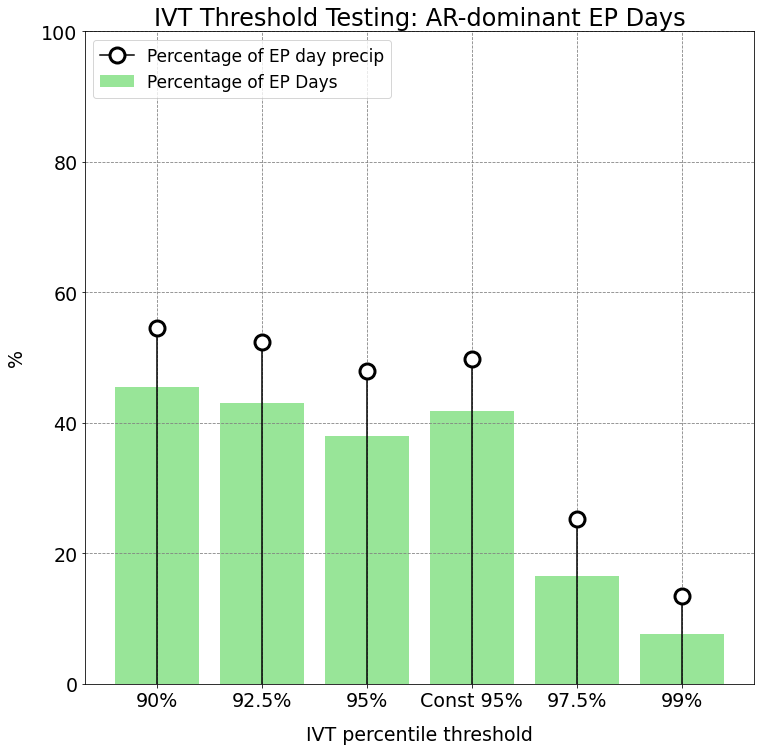

In [4]:
#metric 1: # of days of AR precipitation
print(ar_sum_1)
print(ar_sum_2)
print(sum(select_ar1_obs))
print(sum(select_ar2_obs))
print(len(ar_yesno1))
print([x-y for x,y in zip(ar_all_1,ar_all_2)])
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
metrics=['90%','92.5%','95%','Const 95%','97.5%','99%']
ratios=[ratio_ar1_obs,ratio_ar2_obs,ratio_ar3_obs,ratio_ar4_obs,ratio_ar5_obs,ratio_ar6_obs]

ar_sums=[ar_sum_1,ar_sum_2,ar_sum_3,ar_sum_4,ar_sum_5,ar_sum_6]
ar_sums=[float(x)/float(len(ar_yesno1))*100. for x in ar_sums]
#colors=['c','deepskyblue','dodgerblue','blue','blueviolet','k']
#ax.plot(metrics,ar_sums,color='b')
ax.bar(metrics,ar_sums,color='limegreen',alpha=0.5,label='Percentage of EP Days')
ax.tick_params(labelsize=19)
ax.set_title('IVT Threshold Testing: AR-dominant EP Days',fontsize=24)
ax.set_ylabel('%',labelpad=15,fontsize=19)
#plt.xticks(rotation=75)
ax.set_xlabel('IVT percentile threshold',fontsize=19,labelpad=15)

for i in range(len(ar_sums)):
    plt.axvline(x=metrics[i],ymax=ratios[i]/100.,color='k')
    if i==0:
        ax.plot(metrics[i],ratios[i],color='k',marker='o',mew=3.0,markerfacecolor='w',markersize=15,label='Percentage of EP day precip')
    else:
        ax.plot(metrics[i],ratios[i],color='k',marker='o',mew=3.0,markerfacecolor='w',markersize=15)

ax.set_ylim(0,100)
plt.grid(True,color='grey',linestyle='--')
plt.legend(loc='upper left',fontsize=17)
plt.show()

In [11]:
fig.savefig(dir+'Taiwan_IVT_testing_1.png')

In [5]:
if 1==1:#Taiwan
    dates_pd=pd.DatetimeIndex(dates.values)
    years=[x.year for x in dates_pd]
    print(years)

[1979, 1981, 1981, 1981, 1981, 1981, 1982, 1983, 1984, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1987, 1987, 1988, 1988, 1989, 1990, 1990, 1990, 1991, 1991, 1993, 1993, 1993, 1994, 1995, 1996, 1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1999, 2000, 2001, 2001, 2003, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2007, 2008, 2008, 2009, 2009, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2014, 2014, 2014, 2015, 2015, 2016, 2017, 2017, 2017, 2017, 2019, 2019]


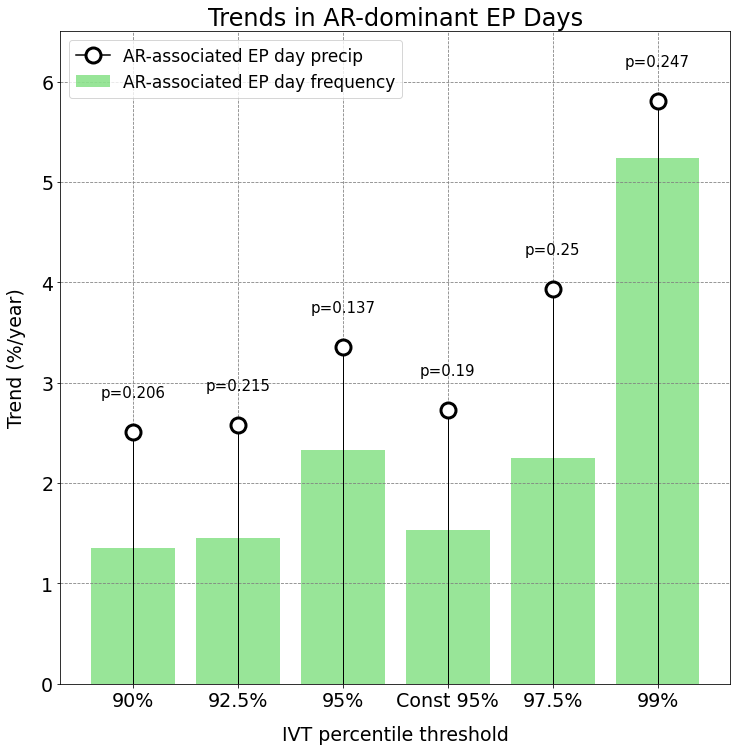

In [6]:
#metric 2: trends in AR day frequency (do % for axis)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
metrics=['90%','92.5%','95%','Const 95%','97.5%','99%']


ar1_annual_list=[]
ar1_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar1_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar1_annual_list.append(num_year)
    ar1_precip_list.append(precip_sum)
    
ar2_annual_list=[]
ar2_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar2_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar2_annual_list.append(num_year)
    ar2_precip_list.append(precip_sum)
    
ar3_annual_list=[]
ar3_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar3_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar3_annual_list.append(num_year)
    ar3_precip_list.append(precip_sum)
    
ar4_annual_list=[]
ar4_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar4_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar4_annual_list.append(num_year)
    ar4_precip_list.append(precip_sum)
    
ar5_annual_list=[]
ar5_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar5_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar5_annual_list.append(num_year)
    ar5_precip_list.append(precip_sum)
    
ar6_annual_list=[]
ar6_precip_list=[]
for i in range(len(np.arange(1979,2020,1))):
    year=1979+i
    select_year=[x for x in zipped_ar6_obs if x[0]==year and x[1]==1]
    num_year=len(select_year)
    precip_year=[x[2] for x in select_year]
    precip_sum=sum(precip_year)
    ar6_annual_list.append(num_year)
    ar6_precip_list.append(precip_sum)

ar1_mean_freq=float(sum(ar1_annual_list))/float(len(ar1_annual_list))
ar2_mean_freq=float(sum(ar2_annual_list))/float(len(ar2_annual_list))
ar3_mean_freq=float(sum(ar3_annual_list))/float(len(ar3_annual_list))
ar4_mean_freq=float(sum(ar4_annual_list))/float(len(ar4_annual_list))
ar5_mean_freq=float(sum(ar5_annual_list))/float(len(ar5_annual_list))
ar6_mean_freq=float(sum(ar6_annual_list))/float(len(ar6_annual_list))

ar1_mean_precip=float(sum(ar1_precip_list))/float(len(ar1_precip_list))
ar2_mean_precip=float(sum(ar2_precip_list))/float(len(ar2_precip_list))
ar3_mean_precip=float(sum(ar3_precip_list))/float(len(ar3_precip_list))
ar4_mean_precip=float(sum(ar4_precip_list))/float(len(ar4_precip_list))
ar5_mean_precip=float(sum(ar5_precip_list))/float(len(ar5_precip_list))
ar6_mean_precip=float(sum(ar6_precip_list))/float(len(ar6_precip_list))

yrs_neusa=np.arange(1979,2020,1)
reg_1=st.linregress(yrs_neusa,ar1_annual_list)
slope_1=reg_1[0]/ar1_mean_freq*100.
p_value_1=reg_1[3]

reg_2=st.theilslopes(ar2_annual_list,yrs_neusa,alpha=0.95)
reg_2=st.linregress(yrs_neusa,ar2_annual_list)
slope_2=reg_2[0]/ar2_mean_freq*100.
p_value_2=reg_2[3]

reg_3=st.theilslopes(ar3_annual_list,yrs_neusa,alpha=0.95)
reg_3=st.linregress(yrs_neusa,ar3_annual_list)
slope_3=reg_3[0]/ar3_mean_freq*100.
p_value_3=reg_3[3]

reg_4=st.theilslopes(ar4_annual_list,yrs_neusa,alpha=0.95)
reg_4=st.linregress(yrs_neusa,ar4_annual_list)
slope_4=reg_4[0]/ar4_mean_freq*100.
p_value_4=reg_4[3]

reg_5=st.theilslopes(ar5_annual_list,yrs_neusa,alpha=0.95)
reg_5=st.linregress(yrs_neusa,ar5_annual_list)
slope_5=reg_5[0]/ar5_mean_freq*100.
p_value_5=reg_5[3]

reg_6=st.theilslopes(ar6_annual_list,yrs_neusa,alpha=0.95)
reg_6=st.linregress(yrs_neusa,ar6_annual_list)
slope_6=reg_6[0]/ar6_mean_freq*100.
p_value_6=reg_6[3]

reg_1a=st.linregress(yrs_neusa,ar1_precip_list)
slope_1a=reg_1a[0]/ar1_mean_precip*100.
p_value_1a=reg_1a[3]

reg_2a=st.linregress(yrs_neusa,ar2_precip_list)
slope_2a=reg_2a[0]/ar2_mean_precip*100.
p_value_2a=reg_2a[3]

reg_3a=st.linregress(yrs_neusa,ar3_precip_list)
slope_3a=reg_3a[0]/ar3_mean_precip*100.
p_value_3a=reg_3a[3]

reg_4a=st.linregress(yrs_neusa,ar4_precip_list)
slope_4a=reg_4a[0]/ar4_mean_precip*100.
p_value_4a=reg_4a[3]

reg_5a=st.linregress(yrs_neusa,ar5_precip_list)
slope_5a=reg_5a[0]/ar5_mean_precip*100.
p_value_5a=reg_5a[3]

reg_6a=st.linregress(yrs_neusa,ar6_precip_list)
slope_6a=reg_6a[0]/ar6_mean_precip*100.
p_value_6a=reg_6a[3]

slopes=[slope_1,slope_2,slope_3,slope_4,slope_5,slope_6]
p_values=[p_value_1,p_value_2,p_value_3,p_value_4,p_value_5,p_value_6]

slopes_precip=[slope_1a,slope_2a,slope_3a,slope_4a,slope_5a,slope_6a]
p_values_precip=[p_value_1a,p_value_2a,p_value_3a,p_value_4a,p_value_5a,p_value_6a]


colors=['c','deepskyblue','dodgerblue','blue','blueviolet','k']

ax.bar(metrics,slopes,color='limegreen',alpha=0.5,label='AR-associated EP day frequency')
for i in range(len(slopes)):
    ax.plot([metrics[i],metrics[i]],[slopes_precip[i],0],color='k',linewidth=1.0)
    if i==0:
        ax.plot(metrics[i],slopes_precip[i],color='k',marker='o',mew=3,markerfacecolor='w',markersize=15,label='AR-associated EP day precip')
    else:
        ax.plot(metrics[i],slopes_precip[i],color='k',marker='o',mew=3,markerfacecolor='w',markersize=15)
    ax.text(metrics[i],slopes_precip[i]+0.35*np.sign(slopes_precip[i]),'p='+str(round(p_values_precip[i],3)),ha='center',fontsize=15)

ax.tick_params(labelsize=19)
ax.set_title('Trends in AR-dominant EP Days',fontsize=24)
ax.set_ylabel('Trend (%/year)',labelpad=15,fontsize=19)
plt.grid(True,color='grey',linestyle='--')
ax.set_ylim(0,6.5)
ax.set_xlabel('IVT percentile threshold',fontsize=19,labelpad=15)
plt.legend(loc='upper left',fontsize=17)
plt.show()

In [9]:
fig.savefig(dir+'Taiwan_IVT_testing_2.png')